# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['DAYS_AGE'] = app_train['DAYS_BIRTH'] / 365
app_train["equal_freq_AGE"] = pd.qcut(app_train['DAYS_AGE'], 5)
app_train["equal_freq_AGE"].value_counts()

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: equal_freq_AGE, dtype: int64

In [6]:
age_groups  = app_train.groupby("equal_freq_AGE").mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_AGE
equal_freq_AGE,,,,,,,,,,,,,,,,,,,,,
"(20.517, 32.038]",277674.662342,0.112824,0.135047,0.376853,0.612498,0.526775,163135.532389,503348.477004,25394.361181,453384.679740,...,0.000732,0.001463,0.007321,0.007480,0.033879,0.230250,0.259275,1.741958,0.003268,27.807808
"(32.038, 39.496]",277950.387520,0.093295,0.097213,0.407616,0.650950,0.857733,180361.102098,608344.616066,27975.095387,546851.839622,...,0.000585,0.000130,0.006301,0.007557,0.034517,0.281398,0.259317,1.811379,0.006325,35.892273
"(39.496, 47.178]",278846.109171,0.078493,0.094311,0.387212,0.702011,0.536621,181722.040185,654371.217627,28856.220625,587183.886975,...,0.000667,0.000049,0.006234,0.006179,0.034001,0.297573,0.256969,1.862633,0.018274,43.203216
"(47.178, 56.093]",278279.404889,0.067392,0.083411,0.318697,0.739767,0.141403,172226.486477,656899.692760,28266.341335,589774.784193,...,0.000423,0.000016,0.006293,0.006760,0.035482,0.293600,0.264730,1.946535,0.135890,51.675907
"(56.093, 69.121]",278152.057387,0.051630,0.066070,0.210131,0.763168,0.022587,146541.589065,572182.245370,25050.872061,514746.342544,...,0.000130,0.000016,0.005924,0.007061,0.033907,0.231347,0.286845,2.128658,0.736710,61.111967


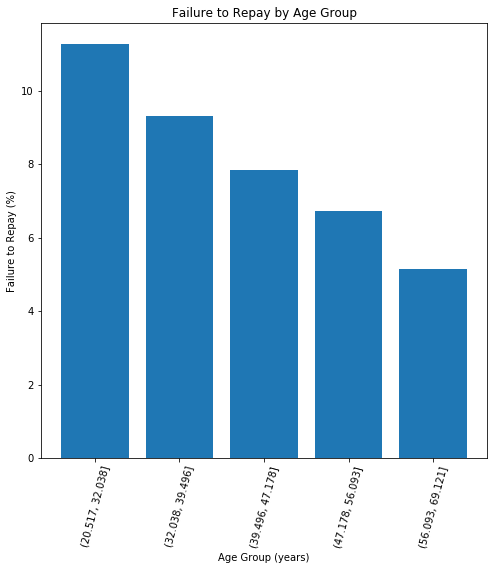

In [7]:
plt.figure(figsize = (8, 8))
px = age_groups.index.astype(str)
py = 100 * age_groups['TARGET']
plt.bar(px, py)


plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

plt.show()